In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import train_test_split

csv = ['/RegularSeasonCompactResults.csv',
'/RegularSeasonDetailedResults.csv',
'/Seasons.csv',
'/Teams.csv',
'/TourneyCompactResults.csv',
'/TourneyDetailedResults.csv',
'/TourneySeeds.csv',
'/TourneySlots.csv',
'/sample_submission.csv']
direct = 'C:/Users/danil/Downloads/Data/March_Madness'
sea_det = pd.read_csv(direct+csv[1])
sea_det.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [148]:
sea_det.drop(labels = ['Numot','Daynum','Wloc'],inplace=True, axis=1)
#sea_det[sea_det['Wteam'] == 1104].head()

In [149]:
# sea_det[sea_det['Wteam'] == 1104].iloc[-3:]
# sea_det[sea_det['Wteam'] == 1104].tail()

In [150]:
#make new table 
wins = pd.DataFrame()
wins_col = ['Season','Wteam', 'Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm',
       'Wfta', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf','Wscore','Lscore']
for i in wins_col:
    wins[i] = sea_det[i]
    
loss = pd.DataFrame()
loss_col = ['Lteam', 'Lfgm','Lfga', 'Lfgm3', 'Lfga3', 'Lftm', 'Lfta', 
            'Lor', 'Ldr', 'Last', 'Lto','Lstl', 'Lblk', 'Lpf','Wscore','Lscore']
for i in loss_col:
    loss[i] = sea_det[i]

f_df = pd.DataFrame()
#print(type(wins['Wteam'].unique()))
for k in wins['Wteam'].unique():
    ar = []
    ar.append(k)
    #last games
    five_df = sea_det[sea_det['Wteam']==k].iloc[-5:]
    ten_df = sea_det[sea_det['Wteam']==k].iloc[-10:]
    fifteen_df = sea_det[sea_det['Wteam']==k].iloc[-15:]
    Tfgp5 = np.mean((five_df['Wfgm']/five_df['Wfga']))
    Tfgp10 = np.mean((ten_df['Wfgm']/ten_df['Wfga']))
    Tfgp15 = np.mean((fifteen_df['Wfgm']/fifteen_df['Wfga']))
    ar.append(Tfgp5)
    ar.append(Tfgp10)
    ar.append(Tfgp15)
    
    #wins
    wins_df = wins[wins['Wteam'] == k]
    #season = wins['Season']

    Wfgp = np.mean((wins_df['Wfgm']/wins_df['Wfga']))
    Wfg3p = np.mean((wins_df['Wfgm3']/wins_df['Wfga3']))
    Wftp = np.mean((wins_df['Wftm']/wins_df['Wfta']))
    #ar.append(season)
    ar.append(Wfgp)
    ar.append(Wfg3p)
    ar.append(Wftp)
    
    other = ['Wor','Wdr','Wast','Wto','Wstl','Wblk','Wpf','Wfgm','Wfgm3','Wftm']
    for i in other:
        metric = np.mean(wins_df[i])
        ar.append(metric)
    NWins = wins_df.shape[0]
    ar.append(NWins)
    
    Wspr = np.mean((wins_df['Wscore'] - wins_df['Lscore']))
    ar.append(Wspr)
    
    #losses
#     loss_df = loss[loss['Lteam'] == k]
    
#     Lfgp = np.mean((loss_df['Lfgm']/loss_df['Lfga']))
#     Lfg3p = np.mean((loss_df['Lfgm3']/loss_df['Lfga3']))
#     Lftp = np.mean((loss_df['Lftm']/loss_df['Lfta']))
    
#     ar.append(Lfgp)
#     ar.append(Lfg3p)
#     ar.append(Lftp)
#     other = ['Lor','Ldr','Last','Lto','Lstl','Lblk','Lpf','Lfgm','Lfgm3','Lftm']
#     for i in other:
#         metric = np.mean(loss_df[i])
#         ar.append(metric)
#     NLoss = loss_df.shape[0]
#     ar.append(NLoss)
    
#     Lspr = np.mean((loss_df['Lscore'] - loss_df['Wscore']))
#     ar.append(Lspr)
    
    Wpct = NWins/(NWins+NLoss)
    ar.append(Wpct)
    
    Lpct = NLoss/(NWins+NLoss)
    ar.append(Lpct)
    
    f_df = f_df.append([ar], ignore_index= True)
f_df.columns = ['Team','Tfgp5','Tfgp10','Tfgp15','Wfgp','Wfg3p','Wftp','Wor','Wdr','Wast',
                               'Wto','Wstl','Wblk','Wpf','Wfgm','Wfgm3','Wftm',
                                'NWins','Wspr',
                               'Wpct','Lpct']
f_df.head()
# 'Lfgp',
#                                'Lfg3p','Lftp','Lor','Ldr','Last',
#                                'Lto','Lstl','Lblk','Lpf','Lfgm','Lfgm3','Lftm','NLoss','Lspr',
# for item in range(25, len(x)):
#     col = x[item][1]
#     f_df.drop(col,axis=1,inplace=True)

# f_df.head()


,Team,Tfgp5,Tfgp10,Tfgp15,Wfgp,Wfg3p,Wftp,Wor,Wdr,Wast,...,Wstl,Wblk,Wpf,Wfgm,Wfgm3,Wftm,NWins,Wspr,Wpct,Lpct
0,1104,0.440031,0.446629,0.444500,0.466998,0.360334,0.698481,11.956522,25.920949,13.375494,...,7.509881,4.865613,16.015810,25.553360,6.328063,15.794466,253,12.909091,0.813505,0.186495
1,1272,0.467703,0.430265,0.436743,0.468580,0.361655,0.672943,13.020000,25.857143,15.934286,...,8.771429,5.931429,17.928571,27.342857,6.905714,16.274286,350,16.360000,0.857843,0.142157
2,1266,0.514344,0.506371,0.498527,0.477928,0.380749,0.721663,11.972028,24.541958,16.433566,...,8.027972,3.604895,17.545455,26.639860,6.538462,17.538462,286,14.314685,0.831395,0.168605
3,1296,0.442661,0.440508,0.435924,0.472999,0.401041,0.686996,11.468531,25.174825,13.804196,...,7.286713,3.902098,18.895105,24.342657,6.776224,16.979021,143,9.503497,0.711443,0.288557
4,1400,0.465076,0.440669,0.446028,0.464493,0.366006,0.690015,13.732484,26.812102,13.671975,...,6.869427,5.312102,17.111465,26.942675,6.535032,16.824841,314,16.235669,0.844086,0.155914


In [151]:
len(x)
# for item in range(10, len(x)):
#     col = x[item][1]
#     f_df.drop(col,axis=1,inplace=True)

# f_df.head()

35

In [152]:
df_tour = pd.read_csv(direct + csv[4])
df_tour.drop(labels=['Daynum', 'Wscore', 'Lscore', 'Wloc', 'Numot'], 
             inplace=True, axis=1)

df_tour = df_tour[(df_tour['Season'] == 2011)|(df_tour['Season'] == 2012)
                  |(df_tour['Season'] == 2013)|(df_tour['Season'] == 2014)|
                  (df_tour['Season'] == 2015)|(df_tour['Season'] == 2016)]
df_tour = df_tour.reset_index()
df_tour.head()
#df_tour = df_tour.rename(columns={'Wteam':'Team'})
#df_tour.head()
#df_dummy = pd.merge(left=df_tour, right=f_df, how='left', on=['Team'])
#df_dummy = df_tour.rename(columns={'Lteam':'Team1'})
#df_dummy1 = pd.merge(left=df_dummy, right=f1_df, how='left', on=['Team1'])
#df_dummy1.head()
# df_concat = pd.merge(left=df_dummy, right=df_lossseeds, on=['Season', 'Lteam'])
# df_concat['seed_diff'] = df_concat.win_seed - df_concat.loss_seed


,index,Season,Wteam,Lteam
0,1648,2011,1155,1412
1,1649,2011,1421,1114
2,1650,2011,1427,1106
3,1651,2011,1433,1425
4,1652,2011,1139,1330


In [153]:
def create_diff_table(tour):
    df_diff = pd.DataFrame()
    for i in range(0,len(tour)):
        wteam = tour['Wteam'][i]   
        lteam = tour['Lteam'][i] 
        wteam_stat = (f_df.loc[f_df['Team'] == wteam])
        lteam_stat = (f_df.loc[f_df['Team'] == lteam])
        diff = pd.DataFrame(wteam_stat.values - lteam_stat.values, columns = wteam_stat.columns)
        df_diff = df_diff.append([diff], ignore_index= True)
    return df_diff
df_diff = create_diff_table(df_tour)

In [154]:
import random

# df_wins = pd.DataFrame()
# df_wins = df_diff
# df_wins['result'] = 1

# df_losses = pd.DataFrame()
# df_losses = -df_diff
# df_losses['result'] = 0

# Randomly select left and right and 0 or 1 so we can train
#for multiple classes.
df_pred = df_diff 
df_pred['result'] = 1
for i in range(len(df_pred)):
    if random.random() > 0.5:
        df_pred['result'][i] = 1
    else:
        df_pred.loc[i:i] = -df_diff.loc[i:i]
        df_pred['result'][i] = 0 

# df_pred = pd.concat((df_wins, df_losses))
df_pred.head(20)

,Team,Tfgp5,Tfgp10,Tfgp15,Wfgp,Wfg3p,Wftp,Wor,Wdr,Wast,...,Wblk,Wpf,Wfgm,Wfgm3,Wftm,NWins,Wspr,Wpct,Lpct,result
0,257.0,0.048035,0.045498,0.038737,-0.008298,-0.000487,0.032964,-0.980489,0.456269,0.725958,...,-1.501468,0.740168,-0.402132,0.248996,1.071340,26.0,-2.721899,0.014751,-0.014751,0.0
1,-307.0,0.053760,0.053438,0.044493,-0.022879,0.026456,-0.016139,-0.645733,-1.902174,-2.704106,...,-1.365942,1.461353,-2.988124,-0.104670,-1.042271,32.0,-0.791063,0.027991,-0.027991,0.0
2,321.0,0.033611,0.028101,0.025517,0.020283,0.028296,0.068937,-1.902428,0.131227,0.084104,...,-1.201463,-0.314100,1.183671,1.255371,2.122049,-39.0,-0.968773,-0.042142,0.042142,1.0
3,-8.0,-0.009231,-0.019698,-0.022799,0.019086,0.001607,-0.013328,-1.439161,2.580547,-0.391803,...,0.327581,-1.082557,0.209236,-1.532797,0.608883,-112.0,-1.699382,-0.061038,0.061038,0.0
4,-191.0,0.014253,0.012910,0.022567,0.003935,0.016814,0.040473,-3.420449,-2.492627,-2.507950,...,-1.715198,1.084686,-1.439621,1.851808,1.522419,19.0,-0.195966,0.009185,-0.009185,1.0
5,319.0,0.050356,0.009182,0.007755,-0.005976,0.003802,-0.036890,-0.626979,-3.335712,-2.153959,...,-1.119485,-1.173900,-2.665917,-0.573640,-2.022646,-112.0,-5.463897,-0.068954,0.068954,0.0
6,128.0,0.058710,0.048167,0.041232,0.029055,0.025169,0.031122,-1.007695,0.084290,0.998166,...,-1.218062,0.822687,2.083971,0.630582,0.814234,-21.0,0.438517,-0.011028,0.011028,0.0
7,-26.0,-0.023891,-0.016643,0.020283,-0.010252,0.009987,0.022813,-3.613956,-2.434337,-1.684187,...,-4.806978,1.791030,-3.911351,0.291704,-0.704328,-66.0,-4.156634,-0.032841,0.032841,0.0
8,-168.0,-0.074116,-0.003270,-0.016345,0.015495,-0.019789,-0.021637,1.974196,0.067107,1.119250,...,0.284355,-2.275557,2.923415,0.949246,-0.713736,103.0,5.806968,0.054024,-0.054024,1.0
9,-174.0,0.116091,0.081104,0.045826,0.045712,0.044821,0.036424,-0.911759,1.277341,1.862742,...,-1.709709,-0.052701,2.538186,1.480970,1.949903,161.0,4.869155,0.086381,-0.086381,1.0


In [155]:
df_pred.drop('Team',inplace = True, axis =1)

In [156]:
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = df_pred.drop('result',axis=1)
X_train=scaler.fit_transform(X_train)

y_train = df_pred['result']

kf = KFold(n_splits = 5, shuffle = True, random_state=8)

model_LR= LogisticRegression()
params = {'C': np.logspace(start=-5, stop=3, num=9)}
model_LR = GridSearchCV(model_LR, params, scoring='neg_log_loss', refit=True)
model_LR.fit(X_train,y_train)

pred_probs = model_LR.predict_proba(X_train)
predictions = model_LR.predict(X_train)

accuracies = cross_val_score(model_LR, X_train, y_train, scoring='accuracy', cv=kf)
average_accuracies = np.mean(accuracies)
print(average_accuracies)

actual = y_train
count= ((predictions-actual)**2).sum()
mse = count/len(actual)
print(mse)

loss = log_loss(y_train, predictions)
print(loss)

# print(pred_probs)

0.691388888889
0.29850746268656714
10.3102018488


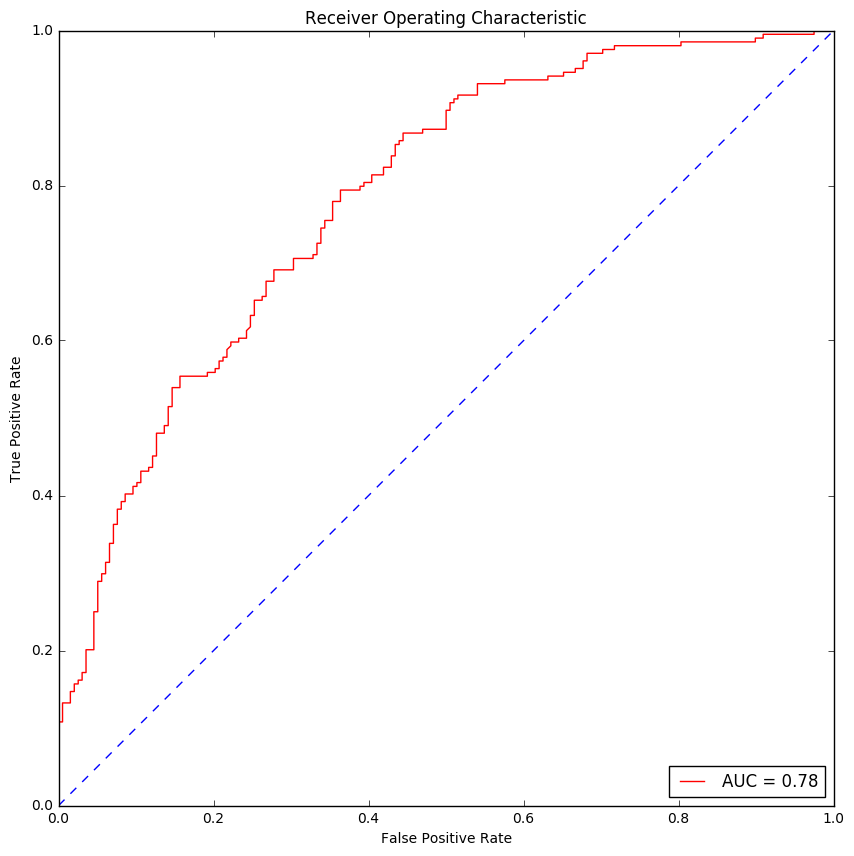

In [157]:
confusion_matrix=metrics.confusion_matrix(y_train,predictions)

auc_roc=metrics.roc_auc_score(y_train,predictions)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, pred_probs[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [158]:
from sklearn.ensemble import RandomForestRegressor
names = df_pred.columns
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))
x = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True)

Features sorted by their score:
[(0.158, 'NWins'), (0.077200000000000005, 'Wspr'), (0.074700000000000003, 'Wor'), (0.0659, 'Wpf'), (0.052400000000000002, 'Lpct'), (0.050799999999999998, 'Wblk'), (0.049700000000000001, 'Tfgp5'), (0.047399999999999998, 'Tfgp10'), (0.047199999999999999, 'Wstl'), (0.047, 'Wftp'), (0.044299999999999999, 'Wast'), (0.041000000000000002, 'Wfgp'), (0.0402, 'Wdr'), (0.037900000000000003, 'Wfg3p'), (0.036799999999999999, 'Wftm'), (0.030200000000000001, 'Wfgm'), (0.028799999999999999, 'Tfgp15'), (0.0264, 'Wfgm3'), (0.023099999999999999, 'Wpct'), (0.021000000000000001, 'Wto')]


In [241]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X_train,y_train)
 
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

Features sorted by their rank:
[(1, 'NLoss'), (2, 'Wast'), (3, 'Last'), (4, 'Wpf'), (5, 'Lspr'), (6, 'Wto'), (7, 'Lftp'), (8, 'Lor'), (9, 'Wor'), (10, 'Wspr'), (11, 'Lfgp'), (12, 'Wftp'), (13, 'Lto'), (14, 'Ldr'), (15, 'NWins'), (16, 'Lpf'), (17, 'Lfg3p'), (18, 'Wfgp'), (19, 'Wstl'), (20, 'Wblk'), (21, 'Wdr'), (22, 'Lstl'), (23, 'Wfg3p'), (24, 'Lblk')]


In [242]:
from sklearn.linear_model import RandomizedLasso
from sklearn.datasets import load_boston

rlasso = RandomizedLasso(alpha=0.025)
rlasso.fit(X_train, y_train)
 
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), 
                 names), reverse=True))

Features sorted by their score:
[(0.0, 'Wto'), (0.0, 'Wstl'), (0.0, 'Wspr'), (0.0, 'Wpf'), (0.0, 'Wor'), (0.0, 'Wftp'), (0.0, 'Wfgp'), (0.0, 'Wfg3p'), (0.0, 'Wdr'), (0.0, 'Wblk'), (0.0, 'Wast'), (0.0, 'NWins'), (0.0, 'NLoss'), (0.0, 'Lto'), (0.0, 'Lstl'), (0.0, 'Lspr'), (0.0, 'Lpf'), (0.0, 'Lor'), (0.0, 'Lftp'), (0.0, 'Lfgp'), (0.0, 'Lfg3p'), (0.0, 'Ldr'), (0.0, 'Lblk'), (0.0, 'Last')]


In [83]:
#predict
df_sample_sub = pd.read_csv(direct+csv[8])

n_test_games = len(df_sample_sub)
print(f_df.shape)

def get_year_t1_t2(id):
    return (int(x) for x in id.split('_'))

# df_diff = create_diff_table(df_tour)
# df_diff.head()

# X_test = np.zeros(shape=(n_test_games, 25))
X_test = pd.DataFrame()
for ii, row in df_sample_sub.iterrows():
    year, t1, t2 = get_year_t1_t2(row.id)
    t1_stat = (f_df.loc[f_df['Team'] == t1])
    t2_stat = (f_df.loc[f_df['Team'] == t2])
    diff = pd.DataFrame(t1_stat.values - t2_stat.values)
    X_test = X_test.append([diff], ignore_index= True)
X_test.head()



(355, 36)


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,-4.0,-0.074877,-0.047386,-0.039664,0.001940,-0.007541,-0.056143,0.271352,-1.211525,2.262954,...,0.844902,0.918431,2.169608,1.059412,1.260980,0.835294,-54.0,1.758627,0.130680,-0.130680
1,-9.0,-0.052607,-0.019022,-0.049471,-0.017124,-0.011784,-0.041633,-0.553130,-1.631391,-0.886344,...,0.692459,-0.116284,2.197814,-1.485027,1.426120,-1.309836,28.0,-1.240328,-0.066436,0.066436
2,-22.0,-0.085056,-0.060215,-0.077604,-0.027074,-0.012996,-0.026795,0.673724,-0.837773,-1.820050,...,-0.495821,0.842488,-0.358706,-1.162786,-1.629055,0.286567,16.0,0.104179,-0.028462,0.028462
3,-26.0,-0.039778,-0.026746,-0.020111,-0.009533,-0.008884,-0.029204,0.816688,-0.809342,0.566220,...,0.290276,0.713849,0.671639,-0.803794,0.473444,-0.109945,-31.0,0.326740,0.089543,-0.089543
4,-34.0,-0.025821,-0.017493,-0.036391,-0.003681,-0.015142,-0.044440,1.965210,-1.474016,1.279517,...,0.937701,0.742299,0.739080,1.498391,0.709425,0.364368,-24.0,0.825057,0.069084,-0.069084


In [80]:
X_test.shape

(9112, 36)

In [84]:
X_test.drop(0,inplace = True, axis =1)

In [86]:
X_test=scaler.fit_transform(X_test)
preds = model_LR.predict_proba(X_test)[:,1]

clipped_preds = np.clip(preds, 0.1, 0.9)
df_sample_sub.pred = clipped_preds
df_sample_sub.head()

,id,pred
0,2013_1103_1107,0.579697
1,2013_1103_1112,0.295345
2,2013_1103_1125,0.479610
3,2013_1103_1129,0.596641
4,2013_1103_1137,0.591003


In [87]:
df_sample_sub.to_csv('danny_mm_17_2.csv', index=False)

In [97]:
from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# i1 = []
# mse1 = []
#for i in range(1,300):
knn = KNeighborsRegressor(n_neighbors=1, algorithm = 'ball_tree', leaf_size = 10)
# Fit the model on the training data.
knn.fit(X_train, y_train)
# Make predictions on the test set using the fit model.
predictions = knn.predict(X_train)
print(predictions)
# for y in range(len(predictions)):
#     if predictions[y] >= 0.5:
#         predictions[y] = 1
#     else:
#         predictions[y] = 0

actual = y_train
count= ((predictions-actual)**2).sum()
mse = count/len(actual)
print(mse)


accuracies = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=10)
average_accuracies = np.mean(accuracies)
print(average_accuracies)


loss = log_loss(y_train, predictions)
print(loss)

# i1.append(i)
# mse1.append(mse)
# print(predictions)
#print(i1)

[ 1.  1.  1.  1.  1.  1.  0.  1.  0.  0.  1.  1.  1.  1.  0.  1.  0.  0.
  1.  1.  1.  0.  0.  1.  0.  1.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.
  0.  1.  0.  0.  1.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.
  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.
  1.  1.  1.  1.  0.  1.  0.  1.  1.  1.  1.  0.  0.  0.  1.  0.  0.  1.
  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  0.  1.  1.  0.  0.  0.  1.  1.  1.  1.  0.  1.  1.
  0.  0.  1.  0.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  1.  1.
  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  1.  0.  1.  1.  1.  0.  0.
  0.  0.  0.  0.  1.  1.  1.  1.  0.  1.  0.  1.  1.  0.  1.  1.  0.  0.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  1.  1.  0.  1.  0.
  0.  1.  1.  0.  1.  1.  0.  1.  1.  0.  1.  1.  1.  1.  0.  1.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  1.  1.  1.  0.  1.  0.  0.  0.
  1.  1.  1.  1.  0.  1.  0.  0.  1.  0.  0.  1.  1

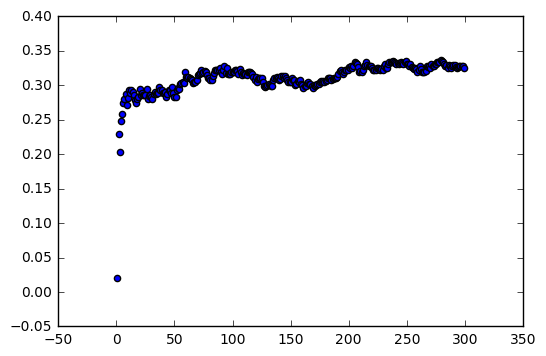

In [291]:
plt.scatter(i1,mse1)